In [1]:
import numpy as np
import pandas as pd
import torch
from typing import Optional, Literal, Union
import matplotlib.pyplot as plt

# we use a local copy of the fast_soft_sort manually downloaded from
# https://github.com/google-research/fast-soft-sort/tree/master
from fast_soft_sort.pytorch_ops import soft_rank

In [11]:
def rank(y: torch.Tensor) -> torch.Tensor:
    "Rank real numbers."
    r = torch.empty_like(y)
    r[0, y.argsort(dim=1)] = torch.arange(1, y.numel() + 1, dtype=y.dtype)
    return r

In [74]:
n = 25
regularization_strength = 0.1

cols = \
    (
        torch.full((n, 1), 1),
        torch.full((n, 1), 2),
        torch.full((n, 1), 3),
        torch.linspace(3.0001, 3.9999, n).reshape(-1, 1),
        torch.full((n, 1), 4),
        torch.full((n, 1), 5)
    )

origi_vals = torch.cat(cols, dim=1)
ranks_soft = soft_rank(origi_vals)

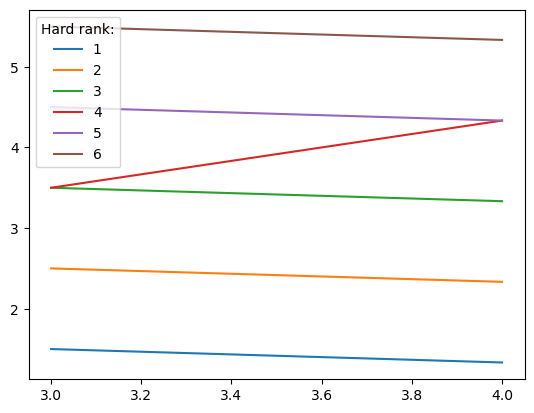

In [77]:
fig, axs = plt.subplots()
j = 3
for i in range(ranks_soft.size()[1]):
    axs.plot(origi_vals[:, j], ranks_soft[:, i], label=f"{i + 1}")
axs.legend(title="Hard rank:")
plt.show()

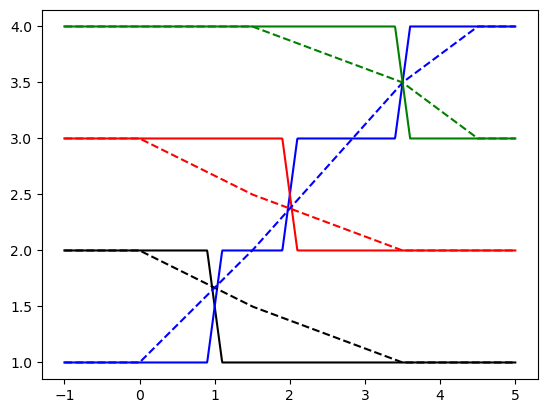

In [227]:
n = 1000
rg = "l2"

v = torch.linspace(-1, 5, n)

cols = \
    (
        torch.full((n, 1), 1.),
        v.reshape(-1, 1),
        torch.full((n, 1), 2.),
        torch.full((n, 1), 3.5)
    )

fig, axs = plt.subplots()

for rs, ls in zip([0.1, 1.0], ['-', '--']):
    ranks_soft = soft_rank(torch.cat(cols, dim=1), regularization=rg, regularization_strength=rs)
    for i, c in zip(range(4), ['k', 'b', 'r', 'g']):
        axs.plot(v, ranks_soft[:, i], linestyle=ls, c=c)

plt.show()

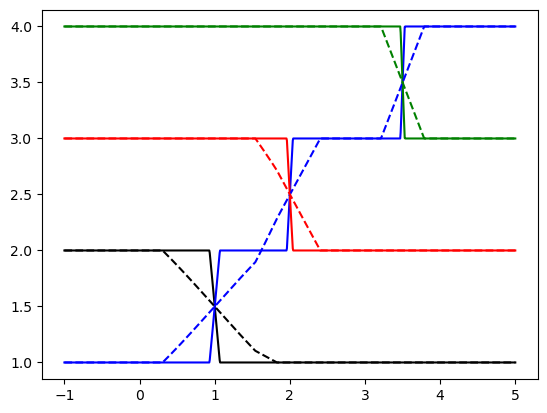

In [228]:
n = 1000
rg = "kl"

v = torch.linspace(-1, 5, n)

cols = \
    (
        torch.full((n, 1), 1.),
        v.reshape(-1, 1),
        torch.full((n, 1), 2.),
        torch.full((n, 1), 3.5)
    )

fig, axs = plt.subplots()

for rs, ls in zip([0.1, 1.0], ['-', '--']):
    ranks_soft = soft_rank(torch.cat(cols, dim=1), regularization=rg, regularization_strength=rs)
    for i, c in zip(range(4), ['k', 'b', 'r', 'g']):
        axs.plot(v, ranks_soft[:, i], linestyle=ls, c=c)

plt.show()

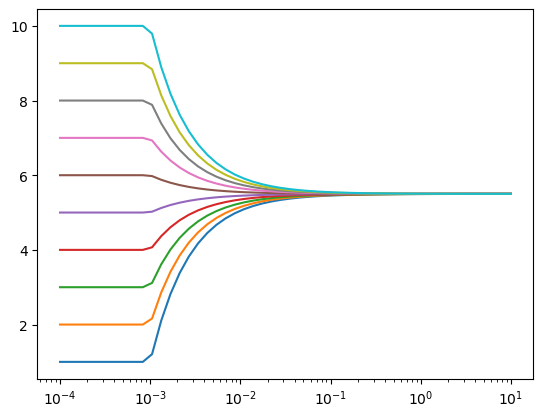

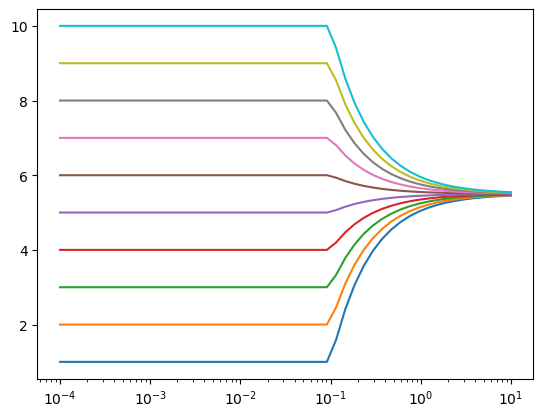

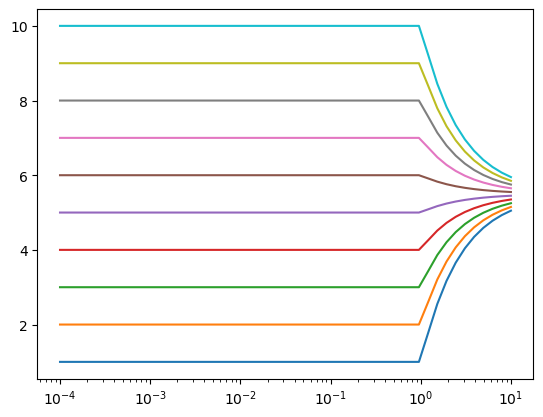

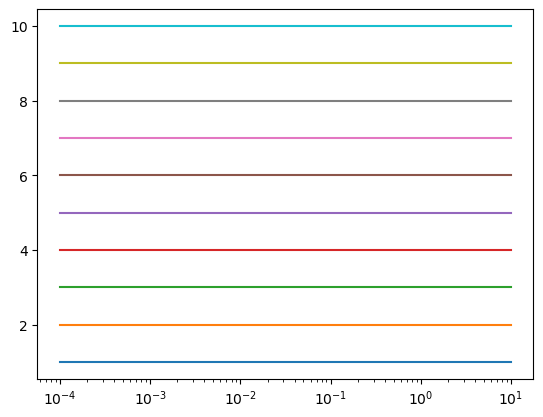

In [216]:
torch.manual_seed(0)
n = 10
m = 50

# t = torch.rand((1, n)).sort().values
t = torch.arange(n).reshape(1, -1)

for scale in [0.001, 0.1, 1., 10.]:
    tt = scale * t
    r = torch.empty((m, n))
    reg_strengths = np.geomspace(0.0001, 10, m)

    for i, regularization_strength in enumerate(reg_strengths):
        r[i, :] = soft_rank(tt, regularization="l2", regularization_strength=regularization_strength)

    fig, axs = plt.subplots()

    for i in range(n):
        axs.plot(reg_strengths, r[:, i], label=f"{i+1}")

    axs.set_xscale('log')
    # axs.set_yscale('log')
    # axs.legend(title="True rank:")
    plt.show()

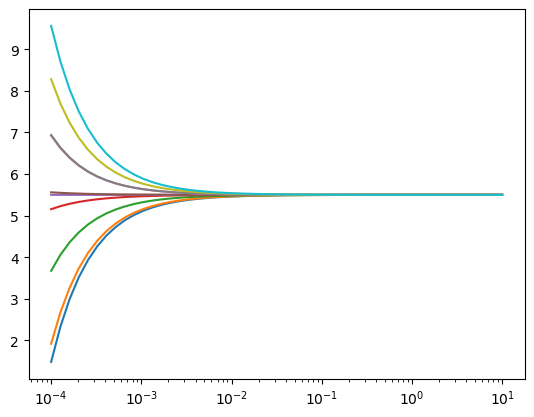

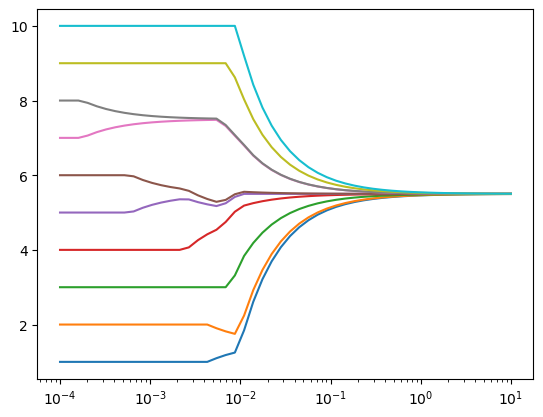

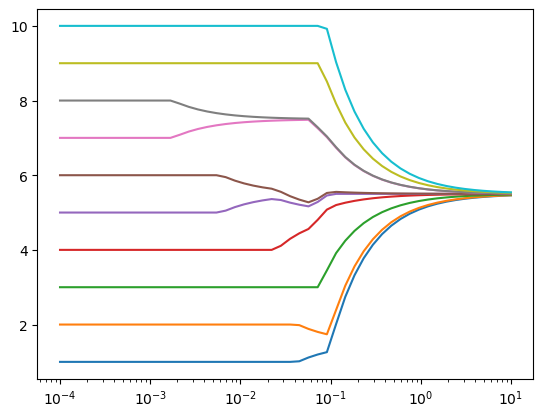

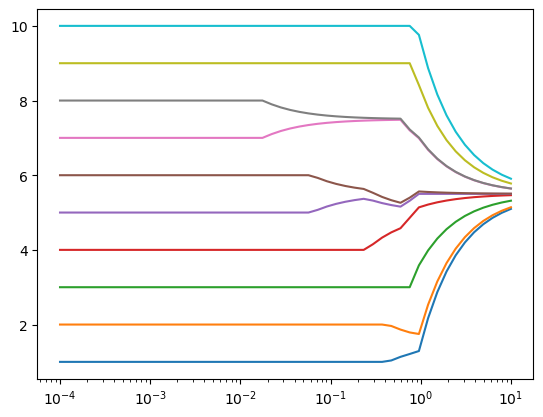

In [217]:
torch.manual_seed(0)
n = 10
m = 50

t = torch.rand((1, n)).sort().values

for scale in [0.001, 0.1, 1., 10.]:
    tt = scale * t
    r = torch.empty((m, n))
    reg_strengths = np.geomspace(0.0001, 10, m)

    for i, regularization_strength in enumerate(reg_strengths):
        r[i, :] = soft_rank(tt, regularization="l2", regularization_strength=regularization_strength)

    fig, axs = plt.subplots()

    for i in range(n):
        axs.plot(reg_strengths, r[:, i], label=f"{i+1}")

    axs.set_xscale('log')
    # axs.set_yscale('log')
    # axs.legend(title="True rank:")
    plt.show()

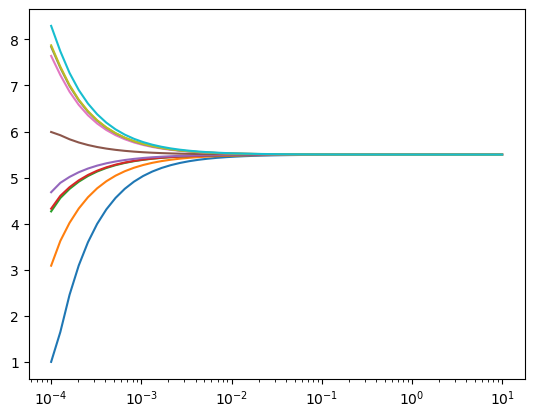

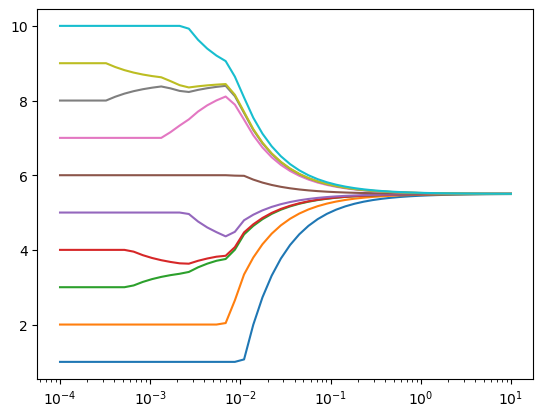

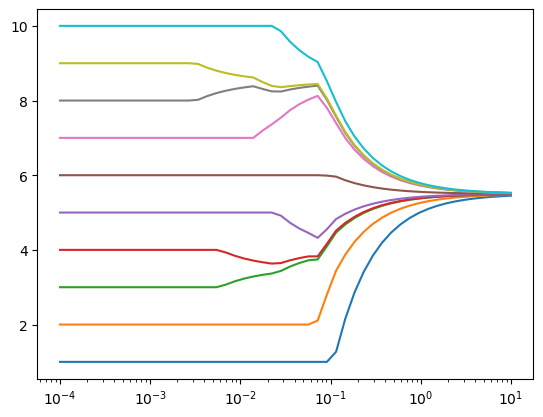

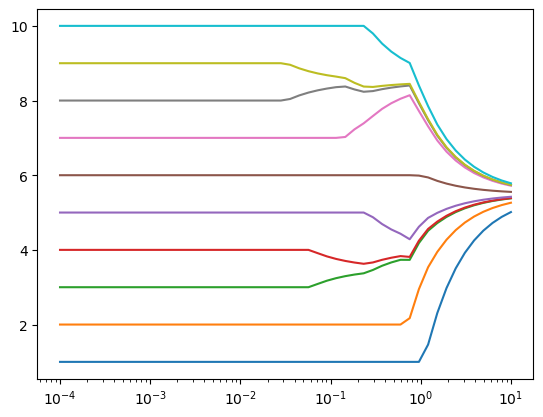

In [136]:
torch.manual_seed(1)
n = 10
m = 50

t = torch.rand((1, n)).sort().values

for scale in [0.001, 0.1, 1., 10.]:
    tt = scale * t
    r = torch.empty((m, n))
    reg_strengths = np.geomspace(0.0001, 10, m)

    for i, regularization_strength in enumerate(reg_strengths):
        r[i, :] = soft_rank(tt, regularization_strength=regularization_strength)

    fig, axs = plt.subplots()

    for i in range(n):
        axs.plot(reg_strengths, r[:, i], label=f"{i+1}")

    axs.set_xscale('log')
    # axs.set_yscale('log')
    # axs.legend(title="True rank:")
    plt.show()

In [179]:
n = 25
regularization_strength = 0.1

cols = \
    (
        torch.full((n, 1), 1),
        torch.full((n, 1), 2),
        torch.full((n, 1), 3),
        torch.linspace(0, 6, n).reshape(-1, 1),
        torch.full((n, 1), 4),
        torch.full((n, 1), 5)
    )

origi_vals = torch.cat(cols, dim=1)
ranks_soft = soft_rank(origi_vals)

In [ ]:
n = 10
v = torch.linspace(0, 5, n)
for v_ in enumerate(v):
    t = torch.tensor([[1, v_, 3, 4]])
    r_hard = rank(t)
    r_soft = soft_rank(t)
    axs.plot()

In [176]:
torch.manual_seed(1)
n = 2
m = 50

X = torch.rand((1, n)).sort().values


w = torch.tensor(1., requires_grad=True)
y = -1 * X
y_hat = w * X
loss = ((rank(y) - soft_rank(y_hat))**2).sum()
torch.autograd.grad(loss, w)[0].item()

0.7071113586425781

In [163]:
(rank(y) - soft_rank(y_hat)).sum()

tensor(-9.5367e-07, grad_fn=<SumBackward0>)

In [144]:
soft_rank(y)

tensor([[5.0129, 5.2629, 5.3808, 5.3867, 5.4224, 5.5531, 5.7183, 5.7380, 5.7413,
         5.7835]], grad_fn=<StackBackward0>)